### Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment Solution

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands


**So interpretation is important!**

### The solution is divided into the following sections:
- Understanding and Visualizing the Data
- Preparing the data for the model
- Model Building and Training
- Validating the Linear Reg Assumptions for the Model.
- Prediction based on the final model for the test set
- Final Conclusion & Suggestions for the company


In [ ]:
#import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


# 1. Understanding and Visualizing the Data 

In [2]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.shape

(730, 16)

In [4]:
day.info()
# No null values present in any columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Check for duplicate values
day_dup = day[:]

day_dup.drop_duplicates(subset = None, inplace = None)
day_dup.shape

(730, 16)

### So, there are no duplicates

## Dropping least important columns 

In [8]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### - instant - It is just is just a row instance identifier so we are dropping this. 
### - dteday - We already have columns mnth, yr , weekday so we don't need this column.

In [9]:
day.drop(columns=['instant','dteday'],axis=1,inplace=True)
day.shape

(730, 14)

In [10]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Converting few columns to categorical

In [11]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
day.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [13]:
day.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [14]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [15]:
# Season column
day[['season']].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})).value_counts()

season
fall      188
summer    184
spring    180
winter    178
dtype: int64

In [16]:
day['season'] = day[['season']].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [17]:
day.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
#mnt column
day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
day.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [19]:
# weeday column
day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
day.weekday.value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

In [20]:
# weathersit
day['weathersit'] = day[['weathersit']].apply(lambda x : x.map({1 : 'Clear',2 : 'Misty',3 : 'Light Rain',4 : 'Heavy Rain'}))

In [21]:
day.weathersit

0      Misty
1      Misty
2      Clear
3      Clear
4      Clear
       ...  
725    Misty
726    Misty
727    Misty
728    Clear
729    Misty
Name: weathersit, Length: 730, dtype: object

In [22]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Analysing the categorical columns

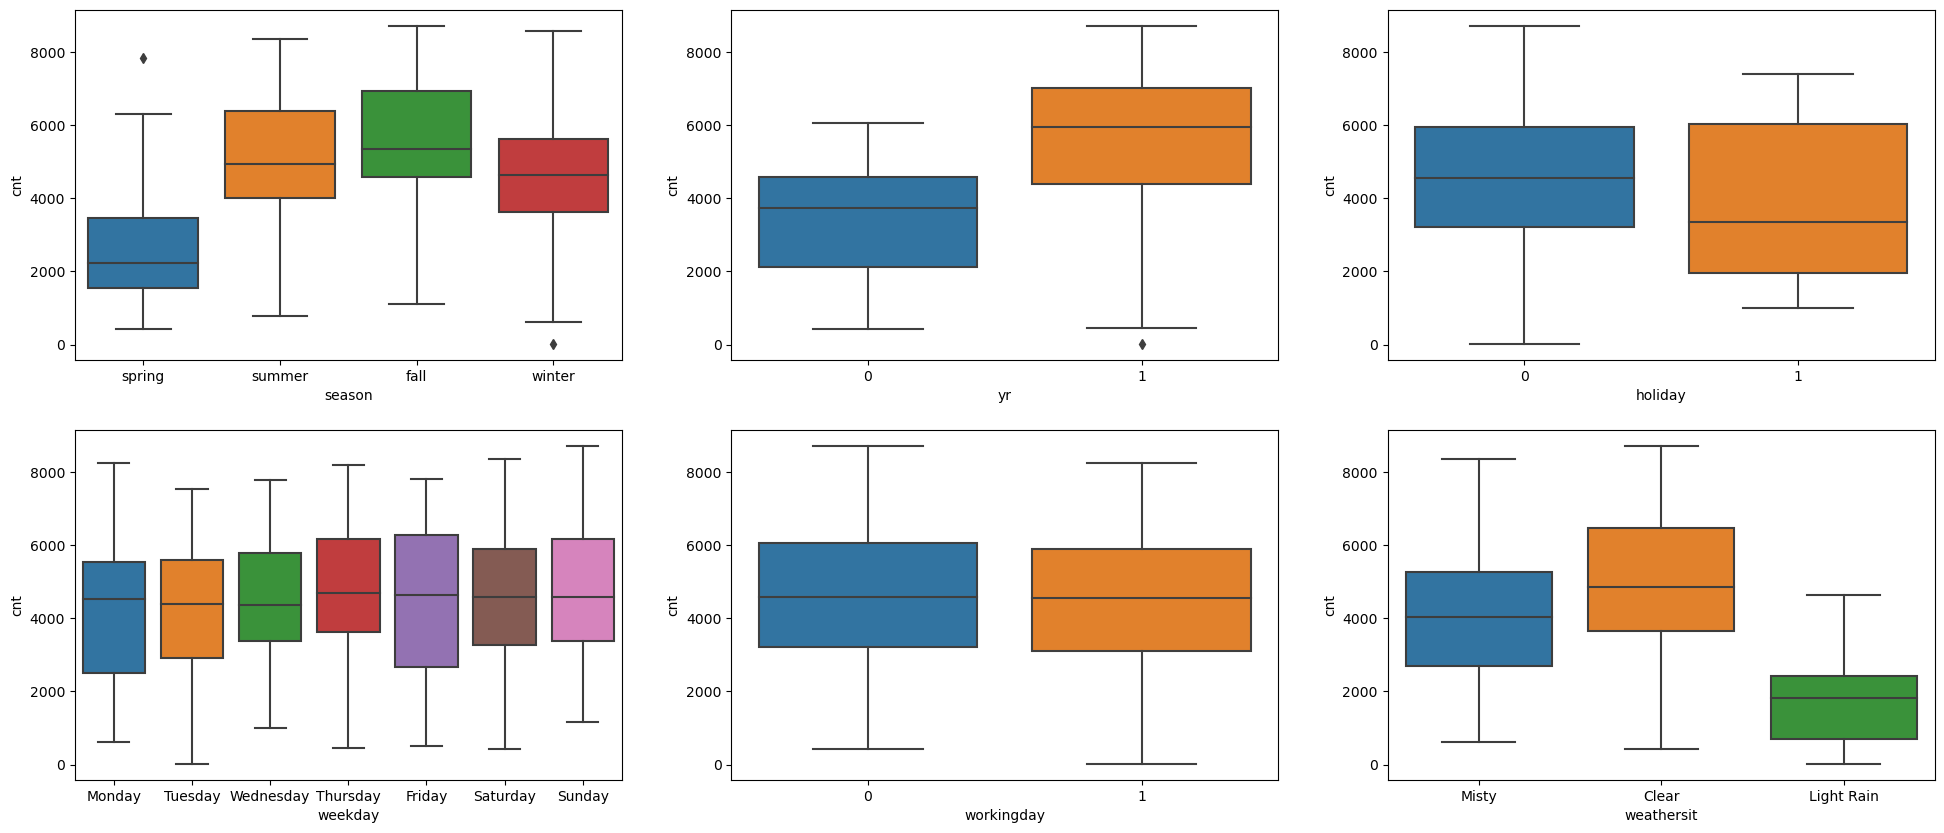

In [23]:
def cat_cols(cat_col,target):
    plt.figure(figsize=(24,10))
    for i in range(0,len(cat_col)):
        plt.subplot(2,3,i+1)
        sns.boxplot(data=day,x=cat_col[i],y=target)
    plt.show()
    
cat_var =['season','yr','holiday','weekday','workingday','weathersit']
cat_cols(cat_var,'cnt')

### - Observation
- season fall has highest count of bikes shared followed by summer.
- yr 2019 has highest count
- Seems like count id more if it is not a holiday.
- Weekday counts are almost similar.
- Weathersit, Clear weather has the highest count.

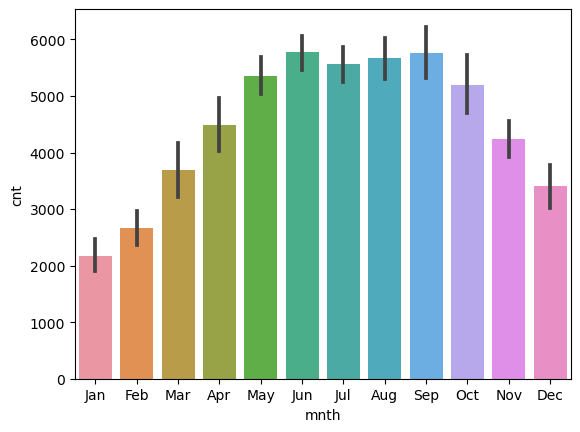

In [24]:
# for the mnt column
sns.barplot(data=day,x='mnth',y='cnt')
plt.show()

### - Observation
- mnt Jun and Sep has the highest count of bikes shared.

## Analysing the numeric columns

In [25]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


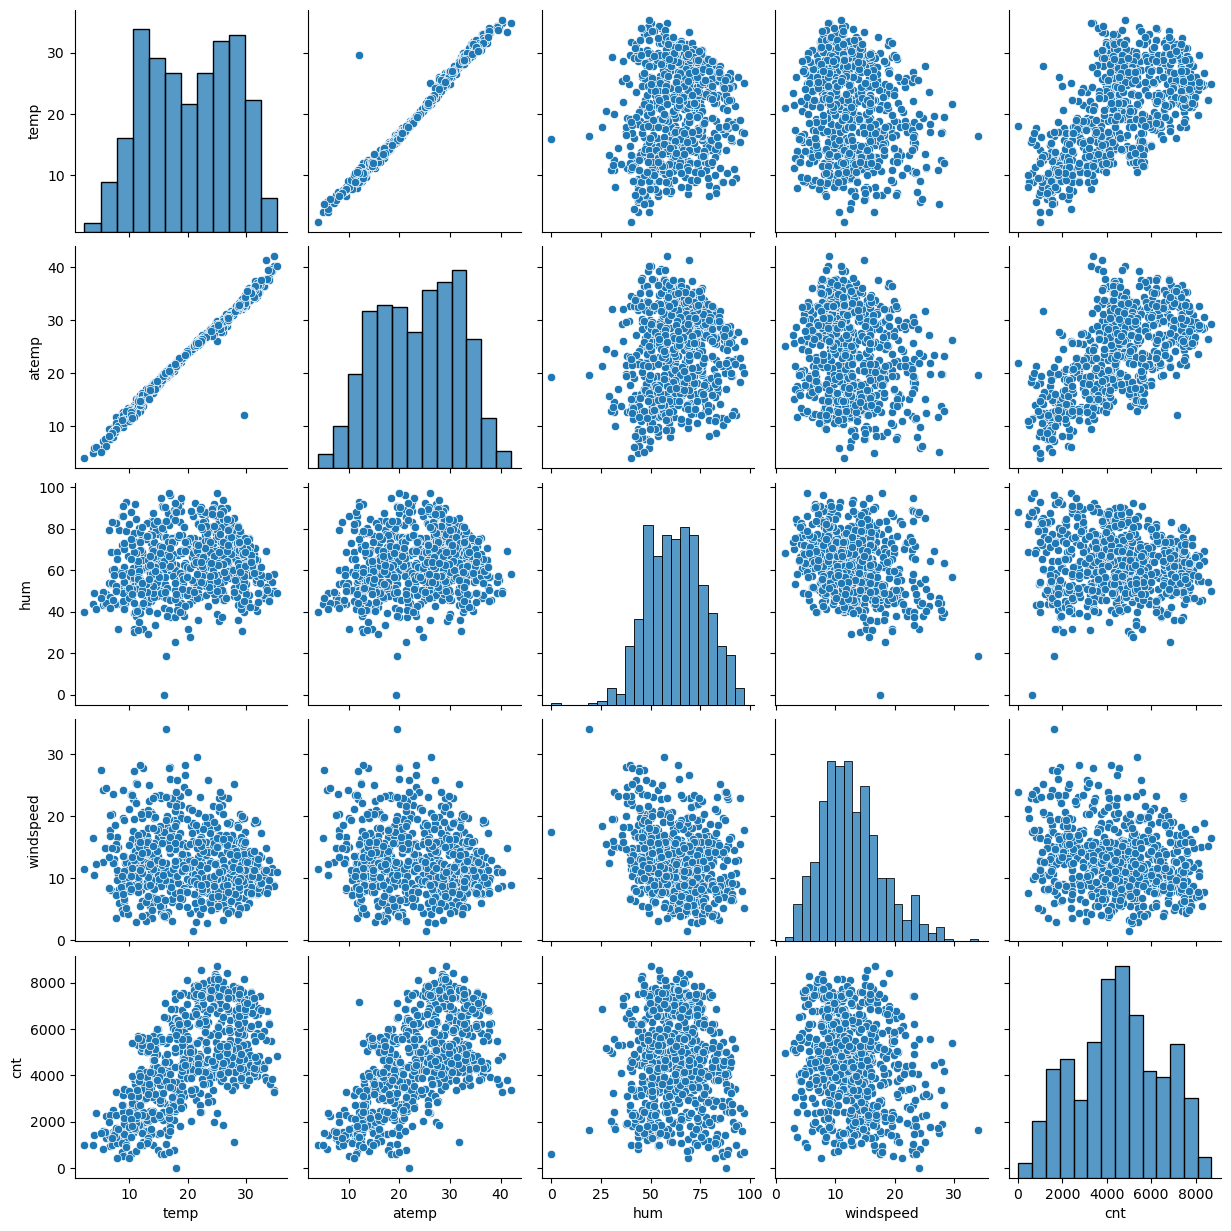

In [26]:
num_var = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(day[num_var])
plt.show()

### - Observation
- Seems like atemp and temp are highly correlated.

<Axes: >

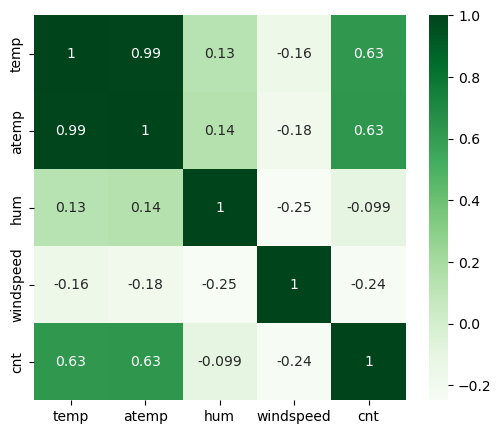

In [27]:
plt.figure(figsize = (6,5))
sns.heatmap(day[num_var].corr(), cmap='Greens', annot=True)

### - Observation
- See variables atemp and temp are highly correlated with each other 0.99.
- Hence we can drop one of these columns further.

# 2. Preparing the data for the model

In [28]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Creating dummy variables for necessary columns

In [29]:
pd.get_dummies(day['season'],drop_first=True)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [30]:
pd.get_dummies(day['weathersit'],drop_first=True)

,Light Rain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [31]:
season = pd.get_dummies(day['season'],drop_first=True)
# Let us not use drop_first for weathersit column as there one waether category not available in the given data. 
weather = pd.get_dummies(day['weathersit'],drop_first=True)
month = pd.get_dummies(day['mnth'],drop_first=True)
weekday = pd.get_dummies(day['weekday'],drop_first=True)


In [32]:
day = pd.concat([season,weather,month,weekday,day],axis=1)
day.head()

,spring,summer,winter,Light Rain,Misty,Aug,Dec,Feb,Jan,Jul,...,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,1,0,0,0,1,0,...,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,0,0,1,0,0,0,1,0,...,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,0,0,0,0,0,0,1,0,...,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,0,0,0,0,0,0,1,0,...,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,0,0,0,0,0,0,1,0,...,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [33]:
# Drop the unnecssary columns mnth, weekday,weathersit,season
day.drop(columns=['mnth', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)


In [34]:
day.shape

(730, 32)

In [35]:
day.columns

Index(['spring', 'summer', 'winter', 'Light Rain', 'Misty', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'yr',
       'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

<Axes: >

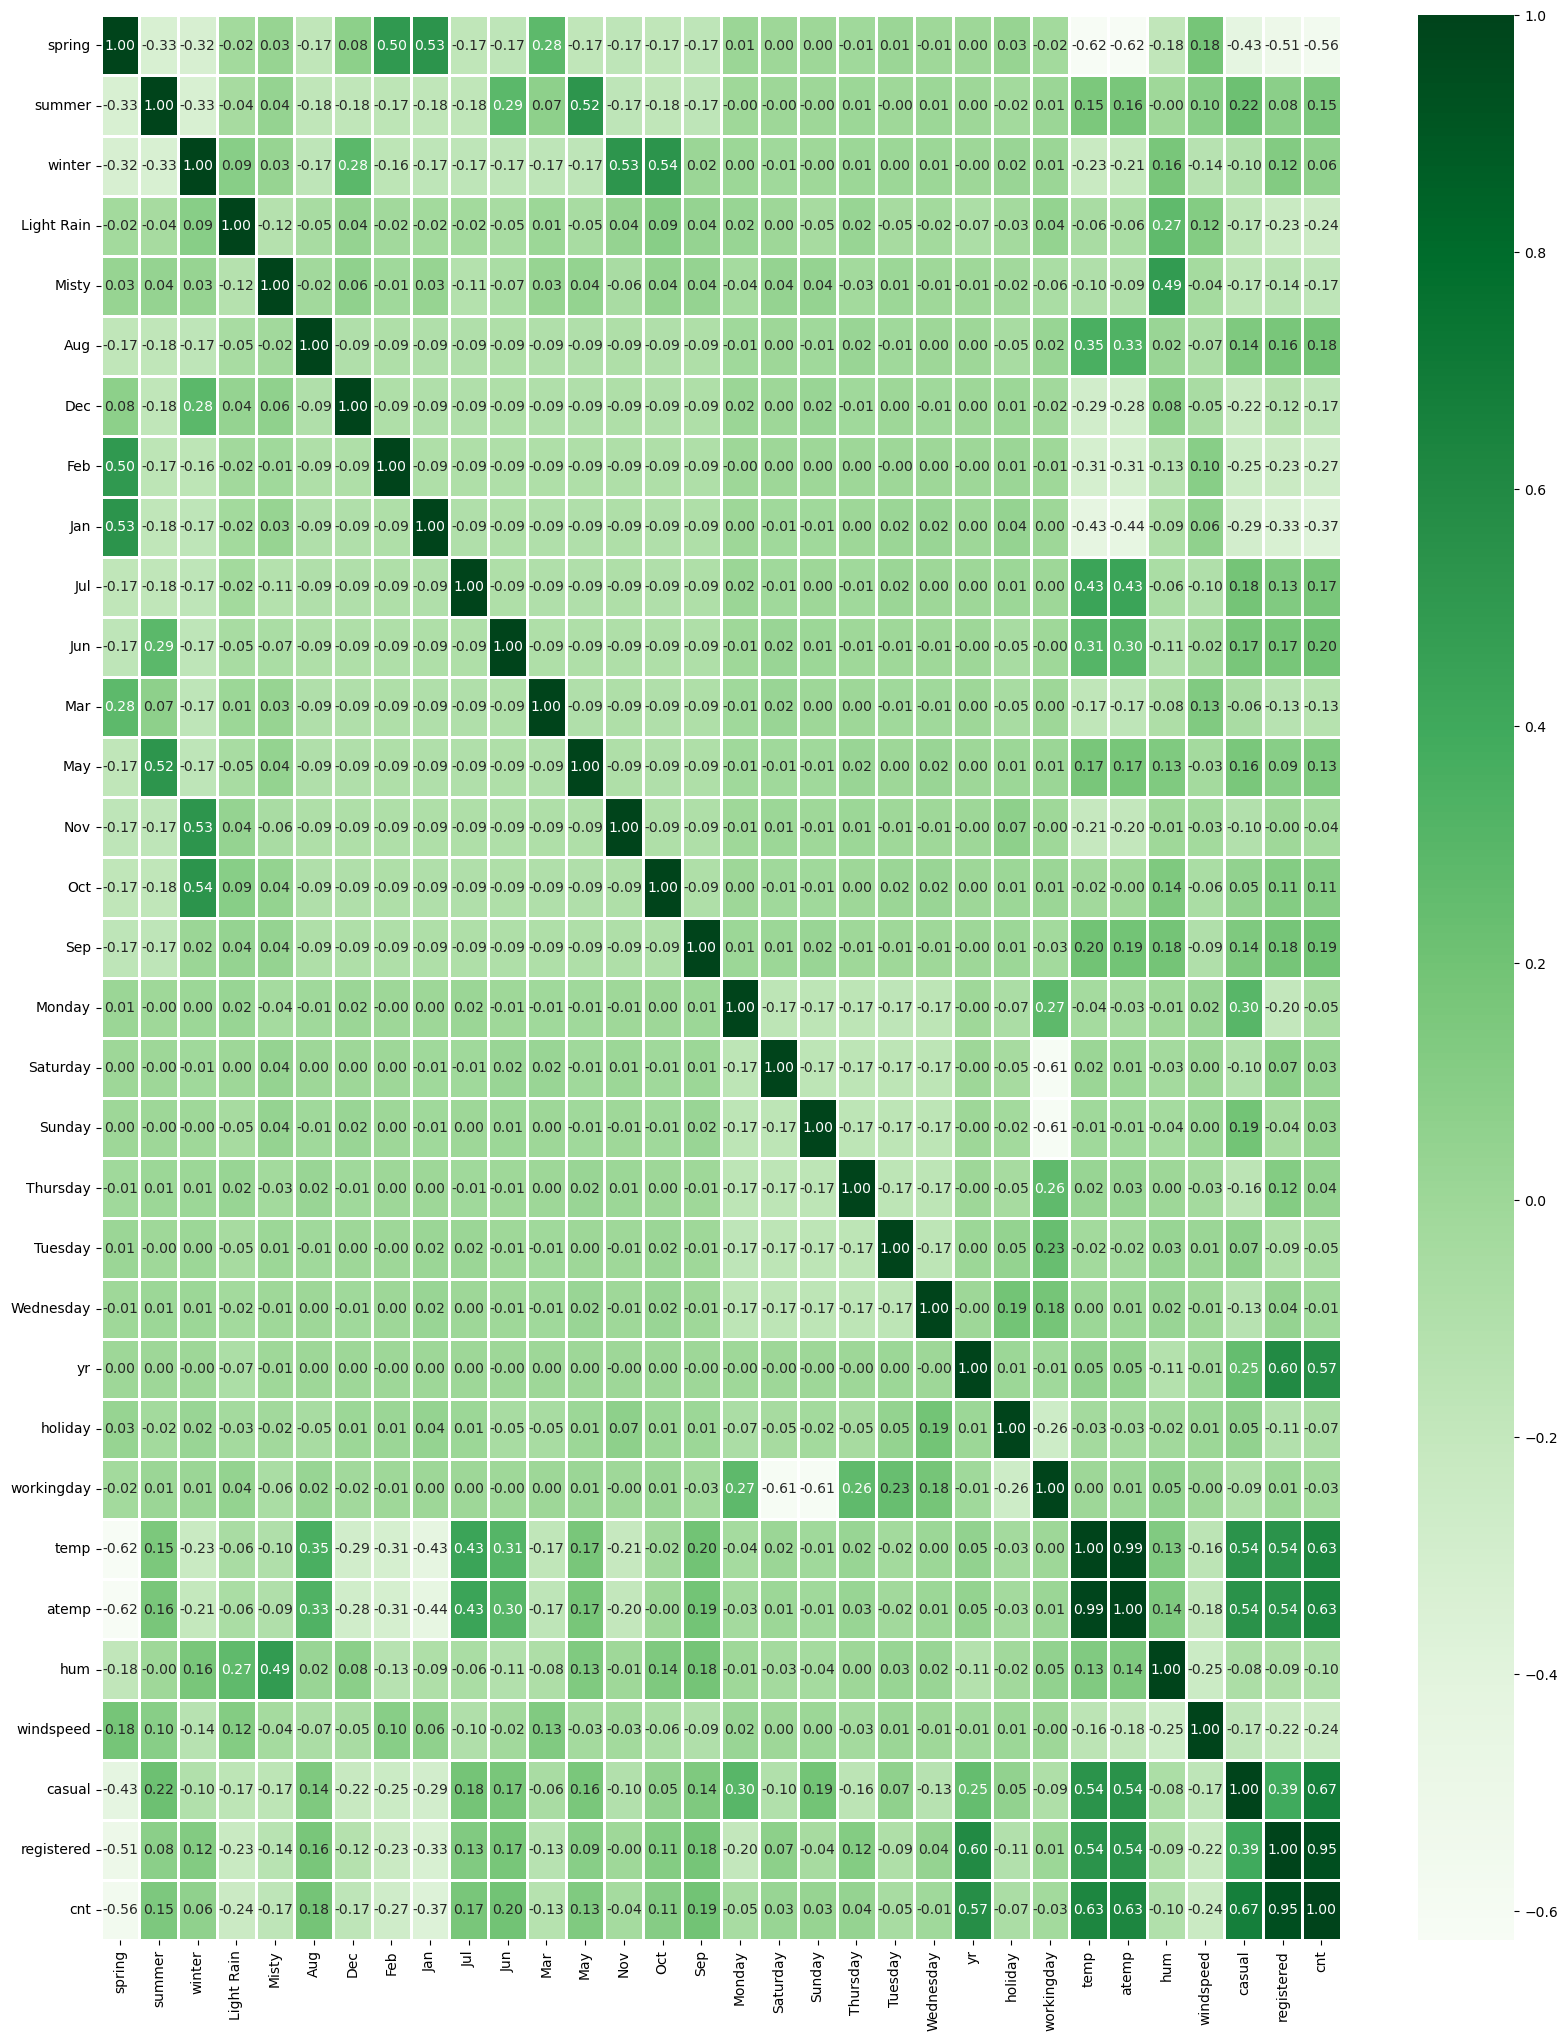

In [36]:
plt.figure(figsize=(20,25))
sns.heatmap(day.corr(),cmap='Greens',annot=True,linewidths=1,fmt='.2f')

### -Observations
- We must take care of the two variables atemp and temp as they are highly correlated.
- Yr and cnt are highly correlated.
- Some of the months are highly correlated with some of the seasons

In [37]:
day.shape

(730, 32)

In [38]:
day.columns

Index(['spring', 'summer', 'winter', 'Light Rain', 'Misty', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'yr',
       'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

## Splitting the data into train and test sets.

In [39]:
np.random.seed(0)
day_train,day_test = train_test_split(day,train_size=0.7,test_size=0.3,random_state=100)

In [40]:
day_train.shape

(510, 32)

In [41]:
day_test.shape

(219, 32)

In [42]:
day_train.head()

,spring,summer,winter,Light Rain,Misty,Aug,Dec,Feb,Jan,Jul,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,0,1,19.201653,23.0423,55.8333,12.208807,922,6612,7534
576,0,0,0,0,0,0,0,0,0,1,...,1,0,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216
426,1,0,0,0,1,0,0,0,0,0,...,1,0,0,16.980847,20.6746,62.1250,10.792293,956,3110,4066
728,1,0,0,0,0,0,1,0,0,0,...,1,0,1,10.489153,11.5850,48.3333,23.500518,364,1432,1796
482,0,1,0,0,1,0,0,0,0,0,...,1,0,0,15.443347,18.8752,48.9583,8.708325,1120,3100,4220


In [43]:
# this is highly corr to temp so dropping this col
day_train.drop('atemp',inplace=True,axis=1)

### Rescaling few of the columns

In [44]:
scaler = MinMaxScaler()

In [45]:
scaler_vars = ['temp','hum','windspeed','cnt','casual','registered']

In [46]:
day_train[scaler_vars] = scaler.fit_transform(day_train[scaler_vars])

In [47]:
day_train.head()

,spring,summer,winter,Light Rain,Misty,Aug,Dec,Feb,Jan,Jul,...,Wednesday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243
576,0,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658
426,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255
728,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096
482,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973


In [48]:
day_train.columns

Index(['spring', 'summer', 'winter', 'Light Rain', 'Misty', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

# 3. Model Building and training

In [49]:
y_train = day_train.pop('cnt')
X_train = day_train.drop(["casual","registered"],axis=1)

In [50]:
X_train.shape

(510, 28)

## Recursive Feature Elimination: 
#### - We shall eliminate few variables by automated process using libraries from sklearn.

In [51]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10,step=1)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('Light Rain', True, 1),
 ('Misty', False, 2),
 ('Aug', False, 14),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 18),
 ('Mar', False, 19),
 ('May', False, 11),
 ('Nov', False, 5),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Monday', False, 13),
 ('Saturday', False, 9),
 ('Sunday', False, 10),
 ('Thursday', False, 17),
 ('Tuesday', False, 12),
 ('Wednesday', False, 15),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [53]:
#Columns where the RFE support is True
X_train.columns[rfe.support_]

Index(['spring', 'winter', 'Light Rain', 'Jul', 'Sep', 'yr', 'holiday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [54]:
#Columns where the RFE support is False
X_train.columns[~rfe.support_]

Index(['summer', 'Misty', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'workingday'],
      dtype='object')

In [55]:
X_train_rfe = X_train.columns[rfe.support_]

In [56]:
# Considering all the 10 columns which are TRUE according to RFE 
X_train_rfe = X_train[X_train_rfe]

In [57]:
# Define function for VIF calculation
def VIF_cal(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values('VIF',ascending = False))

In [58]:
VIF_cal(X_train_rfe)

     Features    VIF
8         hum  15.18
7        temp  13.09
9   windspeed   4.02
0      spring   2.40
5          yr   2.06
1      winter   1.98
3         Jul   1.40
4         Sep   1.20
2  Light Rain   1.11
6     holiday   1.04


## Manual Model Building using Statsmodels

### MODEL 1 - with all variables selected by RFE

In [59]:
# Lets define function for building the model
def build_model(df):
    X_train_sm = sm.add_constant(df)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [60]:
build_model(X_train_rfe)
VIF_cal(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.53e-184
Time:                        13:22:40   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.0

In [61]:

# Column hum(humidity) has very VIF so lets drop it.
X_train_rfe_1 = X_train_rfe.drop(['hum'], axis = 1)

### MODEL 2 - dropped column 'hum'

In [62]:
build_model(X_train_rfe_1)
VIF_cal(X_train_rfe_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          5.33e-171
Time:                        13:22:41   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2042      0.025      8.095      0.0

In [63]:
# Column Sep has high p-value 
X_train_rfe_2 = X_train_rfe.drop(['Sep','hum'], axis = 1)

### MODEL 3 - dropped column 'Sep', 'hum'


In [64]:
build_model(X_train_rfe_2)
VIF_cal(X_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.6
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          2.14e-170
Time:                        13:22:42   Log-Likelihood:                 450.60
No. Observations:                 510   AIC:                            -883.2
Df Residuals:                     501   BIC:                            -845.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2038      0.025      8.022      0.0

In [65]:
# Column holiday has high p-value 
X_train_rfe_3 = X_train_rfe.drop(['holiday','Sep','hum'], axis = 1)

### MODEL 4 - dropped column 'holiday','Sep','hum'


In [66]:
build_model(X_train_rfe_3)
VIF_cal(X_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.5
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          6.81e-170
Time:                        13:22:42   Log-Likelihood:                 446.50
No. Observations:                 510   AIC:                            -877.0
Df Residuals:                     502   BIC:                            -843.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.026      7.947      0.0

#### NOTE:
#### - Now the we can see that there are no columns with high p-value .

### Hypothesis test
- Null Hypothesis : B1=B2=B3=...Bi=0
- Alternate hypothesis : Atleast one Bi != 0

From the above coefficients we can reject the null Hypothesis and from the Prob (F-statistic):  6.81e-170 is very low which tells us that the the fit is not by chance and the model is significant one.

### Best fitted model Equation

In [67]:
cnt = 0.2033 + (-0.1069*spring) + (0.0471*winter)
      + (-0.2494*Light Rain) + (-0.0709*Jul) + (0.2348*yr) + (0.4900*temp) + (-0.1409*windspeed)

IndentationError: unexpected indent (3682215921.py, line 2)

### - Observation from the coeficients

__const__    - The Constant value of ‘0.2033' indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.2033  units

__spring__    - A coefficient value of ‘-0.1069’ indicated that, a unit increase in spring variable, decreases the bike hire numbers by -0.1069 units

__winter__        -A coefficient value of ‘0.0471’ indicated that a unit increase in winter variable increases the bike hire numbers by 0.0471 units

__Light Rain__   - A coefficient value of ‘-0.2494’ indicated that, a unit increase in Light Rain variable, decreases the bike hire numbers by -0.2494 units

__Jul__       -A coefficient value of ‘-0.0709’ indicated that a unit increase in July variable decreases the bike hire numbers by -0.0709 units

__yr__       -A coefficient value of ‘0.2348’ indicated that a unit increase in year variable increases the bike hire numbers by 0.2348 units

__temp__       -A coefficient value of ‘0.4900’ indicated that a unit increase in temperature variable increases the bike hire numbers by 0.4900 units

__windspeed__  - A coefficient value of ‘-0.1409’ indicated that, a unit increase in windspeed variable, decreases the bike hire numbers by  -0.1409 units


# 4. Validating the Linear Reg Assumptions for the Model.

In [68]:
X_train_rfe_3 = sm.add_constant(X_train_rfe_3)
lr = sm.OLS(y_train, X_train_rfe_3).fit()
lr.params

const         0.203333
spring       -0.106929
winter        0.047126
Light Rain   -0.249402
Jul          -0.070897
yr            0.234823
temp          0.490004
windspeed    -0.140936
dtype: float64

### Homoscedasticity


In [69]:
y_train_predicted = lr.predict(X_train_rfe_3)

In [70]:
res = y_train - y_train_predicted

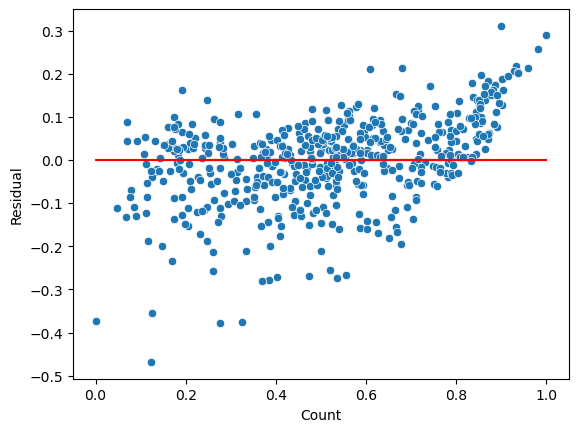

In [71]:
sns.scatterplot(x = y_train, y = res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### We can see that the error terms have a constant variance.

### Linear Relationship between dependent and independent vars

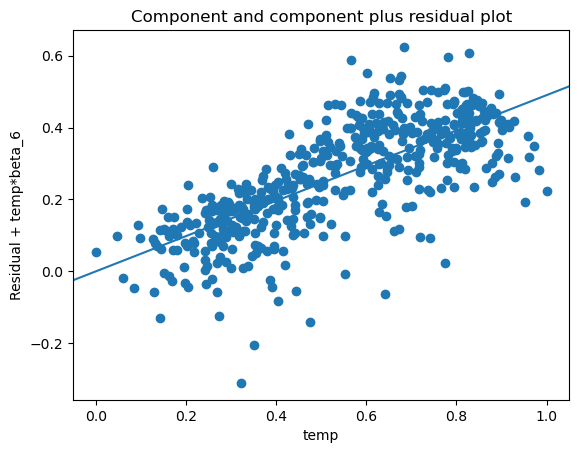

In [72]:
sm.graphics.plot_ccpr(lr, 'temp',)
plt.show()

### Obeservation
 - As temperature increase the Sales also increase. 

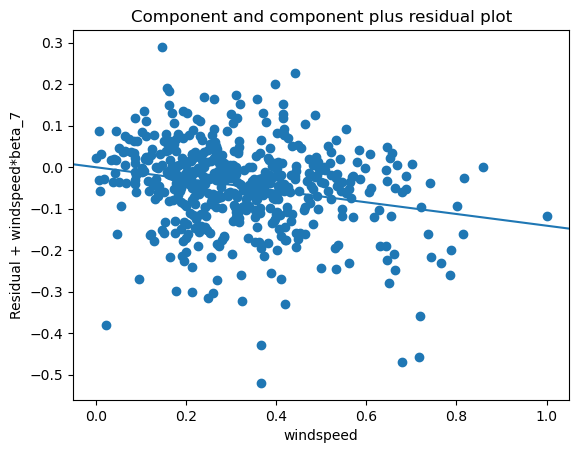

In [73]:
sm.graphics.plot_ccpr(lr, 'windspeed',)
plt.show()

### Observation
   - As windspeed increases the Sales decrease.

In [74]:
lr.params

const         0.203333
spring       -0.106929
winter        0.047126
Light Rain   -0.249402
Jul          -0.070897
yr            0.234823
temp          0.490004
windspeed    -0.140936
dtype: float64

#### As temperature increases the count of bike sharing also is  increasing.

### Multicolinearity

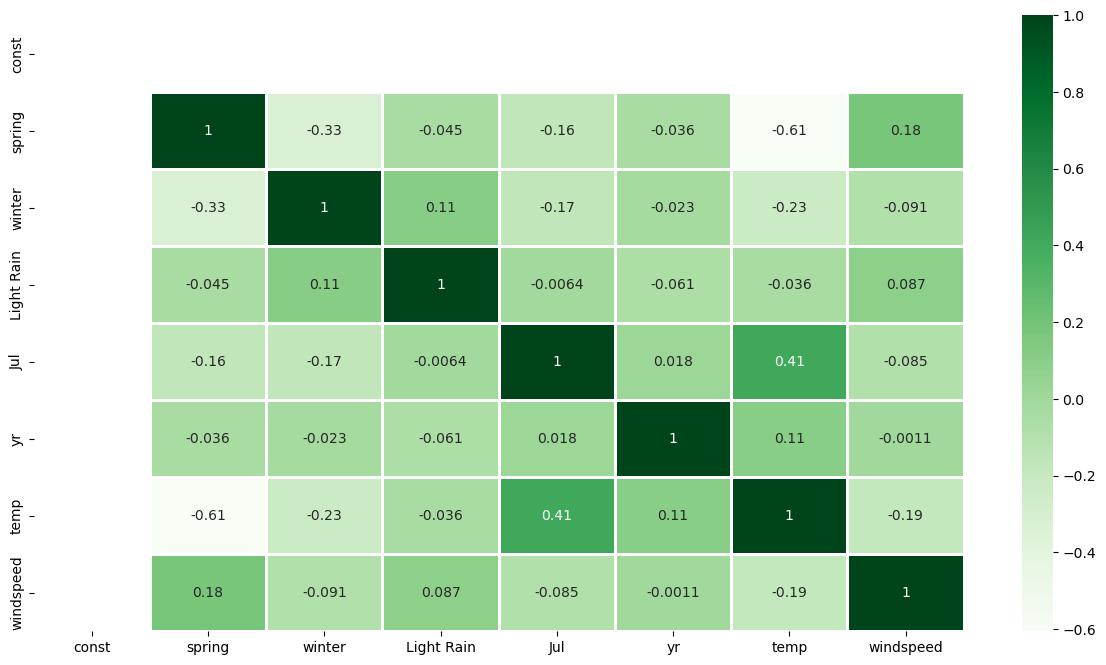

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe_3.corr(),annot = True, cmap="Greens",linewidth =1)
plt.show()

### Error Normality

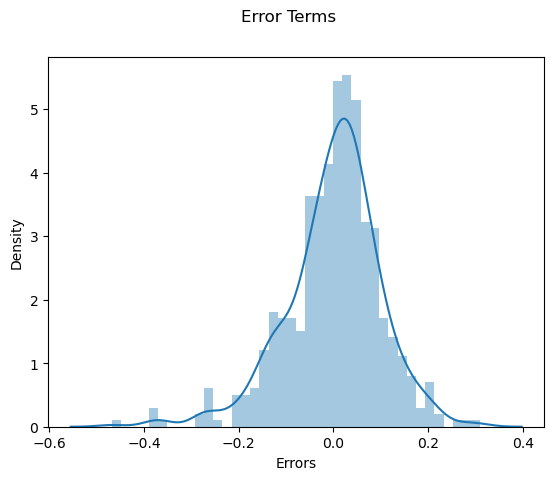

In [78]:
res = y_train-y_train_predicted

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 40)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

#### Errors are also normally distributed

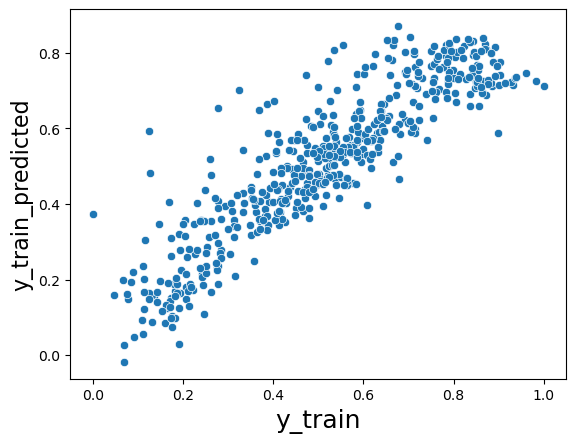

In [79]:
sns.scatterplot(x=y_train,y=y_train_predicted)
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_predicted', fontsize = 16)
plt.show()

# 5. Prediction based on the final model for the test set

### Rescaling test set

In [80]:
#scaler_vars = ['temp','hum','windspeed','cnt','casual','registered']
day_test[scaler_vars] = scaler.transform(day_test[scaler_vars])
day_test.head()

,spring,summer,winter,Light Rain,Misty,Aug,Dec,Feb,Jan,Jul,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
184,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0.831783,33.27085,0.657364,0.084219,0.933557,0.427086,0.692706
535,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0.901354,36.04875,0.610133,0.153728,0.265163,0.767976,0.712034
299,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0.511964,22.85230,0.837699,0.334206,0.072539,0.346376,0.303382
221,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0.881625,34.24915,0.437098,0.339570,0.268820,0.559630,0.547400
152,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.817246,32.19710,0.314298,0.537414,0.223712,0.608143,0.569029


In [81]:
day_test.describe()

,spring,summer,winter,Light Rain,Misty,Aug,Dec,Feb,Jan,Jul,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.027397,0.319635,0.059361,0.086758,0.100457,0.077626,0.105023,...,0.479452,0.036530,0.639269,0.558941,24.255828,0.638508,0.313350,0.266372,0.527146,0.520592
std,0.437258,0.442259,0.423633,0.163612,0.467403,0.236840,0.282125,0.301297,0.268194,0.307285,...,0.500722,0.188034,0.481313,0.233698,8.299641,0.148974,0.159947,0.217246,0.217921,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.002133,0.059486,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.354650,17.085500,0.527265,0.198517,0.101951,0.359154,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.558691,24.873150,0.627737,0.299459,0.223712,0.526567,0.524275
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.759096,31.155725,0.743928,0.403048,0.362085,0.664742,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,1.038708,0.985273,0.963300


In [82]:
# creating the target and predictor
y_test = day_test.pop('cnt')
X_test = day_test.drop(["casual","registered"],axis=1)

In [83]:
# Our model is lr 
cols = X_train_rfe_3.columns
cols = list(cols)
cols.remove('const')
cols

['spring', 'winter', 'Light Rain', 'Jul', 'yr', 'temp', 'windspeed']

In [84]:
X_test = X_test[cols]

In [85]:
# adding constant 
X_test_sm = sm.add_constant(X_test)

In [86]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   spring      219 non-null    uint8  
 2   winter      219 non-null    uint8  
 3   Light Rain  219 non-null    uint8  
 4   Jul         219 non-null    uint8  
 5   yr          219 non-null    int64  
 6   temp        219 non-null    float64
 7   windspeed   219 non-null    float64
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [87]:
y_test_pred = lr.predict(X_test_sm)

### Checking the r2 score or goodness of fit.

In [88]:
train = r2_score(y_true=y_train,y_pred=y_train_predicted)
print("Train set r2_score:",train)
test = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test set r2_score:",test)


Train set r2_score: 0.7980948243647754
Test set r2_score: 0.7848656535877576


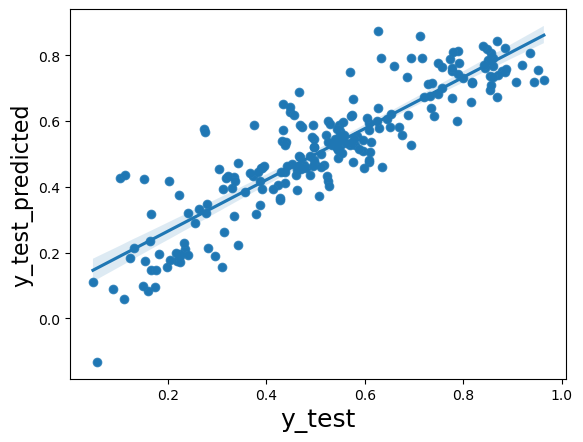

In [89]:
sns.scatterplot(x=y_test,y=y_test_pred)
sns.regplot(x=y_test,y=y_test_pred)
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_predicted', fontsize = 16)
plt.show()

### We could see that the model has good fit on test set as well which tells us that the model is good.

### Adjusted R2 value 

In [90]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-test)*(n-1)/(n-p-1),4)
print("adjusted_r2 for train set : 0.795")
print("adjusted_r2 for test set : ",adjusted_r2)


adjusted_r2 for train set : 0.795
adjusted_r2 for test set :  0.7777


### And also the adjusted R2 of test is very close to R2 train set. 

### Calculating RMSE for the model

In [91]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(y_test,y_test_pred))

In [92]:
round(rmse,5)

0.10108

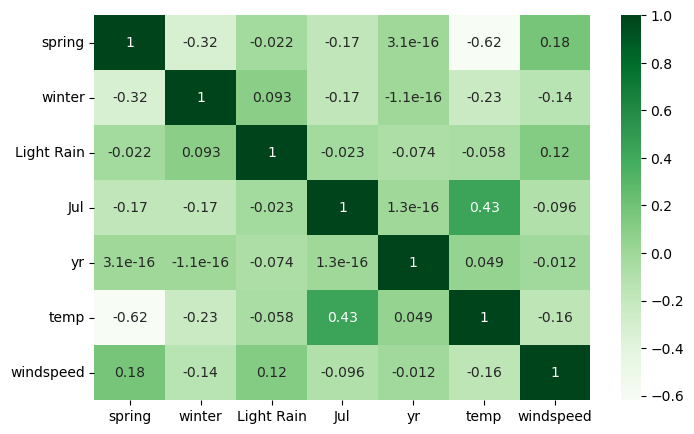

In [93]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(day[cols].corr(), cmap="Greens", annot=True)
plt.show()

# 6. Final Conclusion & Suggestions for the company
#### Major variables effecting the target variable (cnt) are:

###### 1.  __temp__ : It has the highest positive coefficient, which tells us that people prefer much warm weather. Hence to increase profit the company can raise the price when the weather is warm and pleasent.

######  2. __yr__ : The upcoming year will be very important for the company where in they can have high sales as we could see the yr column has second highest positive coefficient and year 2019 had significant rise in bike booking. Hence it is expected that post COVID-19 people would prefer this service than to travel in huge crowds.

###### 3 . The month __July__ and season __Spring__ the comapany has a negative coeeficients so it is better for the company to keep moderate bikes and focus more on service or think about other business ideas to implement during this period. But on the other hand winter season has positive coeeficent and this can increase sales if the comapny has good stock of bikes during this period.

###### 4 . __Weather__ : Seems like people do not prefer renting bikes during Light or Heavy rain or snow. So during these waether the company could give some discounts to the customers so that they won't lose them due to lack of use of their sevice.


###### 6. __windspeed__ :  Seems like even windspeed is also effecting the sales. So it is suggested that during windy days people do prefer renting bikes . So it is important for the comapny to keep this in mind and keep only moderate amount of bikes.

# THANK YOU 